## DBSCAN

In [1]:
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")
X = df.drop(columns="species")
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Función para Visualizar

In [3]:
import matplotlib.pyplot as plt


## Función ligeramente modificada para no requerir centroides en caso que no sea aplicable.
def pca_viz(pca_X, labels, pca_centroids=None, title=None, cmap="viridis"):
    plt.scatter(pca_X[:, 0], pca_X[:, 1], c=labels, cmap=cmap)
    if pca_centroids is not None:
        plt.scatter(
            pca_centroids[:, 0],
            pca_centroids[:, 1],
            marker="*",
            c="red",
            s=150,
        )
    plt.title(title)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

sc = StandardScaler()
dbs = DBSCAN(min_samples=13, eps=0.6)
X_sc = sc.fit_transform(X)
labels = dbs.fit_predict(X_sc)

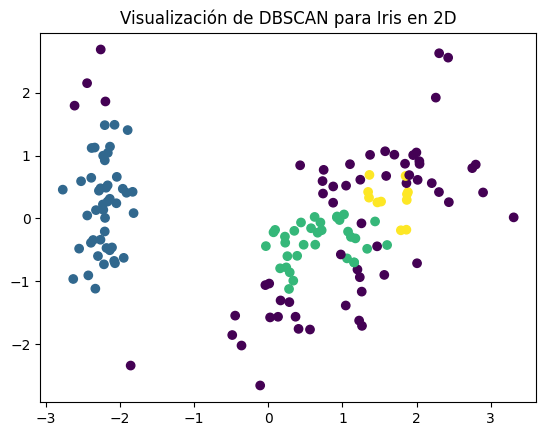

In [14]:
from sklearn.decomposition import PCA

## Probar minPts = 4 y eps = 0.2
## Probar minPts = 10 y eps = 0.5
## Probar minPts = 13 y eps = 0.6
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X_sc)

pca_viz(
    pca_X,
    labels=labels,
    title="Visualización de DBSCAN para Iris en 2D",
)

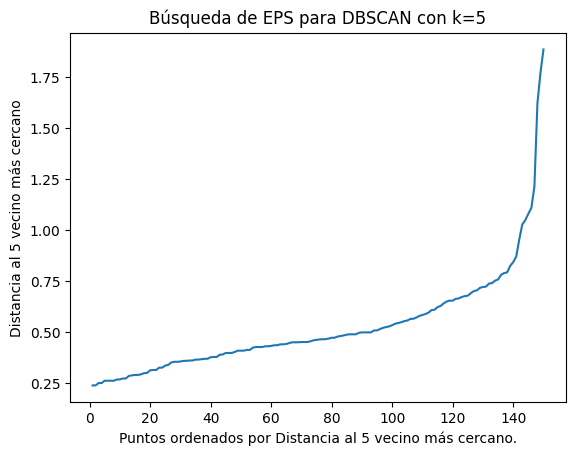

In [15]:
from sklearn.neighbors import NearestNeighbors


def dbscan_elbow_plot(X, k=5):
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    distances, _ = knn.kneighbors(X)
    distances = np.sort(distances[:, -1])
    n_pts = distances.shape[0]

    plt.plot(range(1, n_pts + 1), distances)
    plt.xlabel(
        f"Puntos ordenados por Distancia al {k} vecino más cercano."
    )
    plt.ylabel(f"Distancia al {k} vecino más cercano")
    plt.title(f"Búsqueda de EPS para DBSCAN con k={k}")


# k = 5 escogido ya que tenemos 4 dimensiones.
dbscan_elbow_plot(X_sc, k=5)

## Modelo entrenado con Hiperparámetros Óptimos

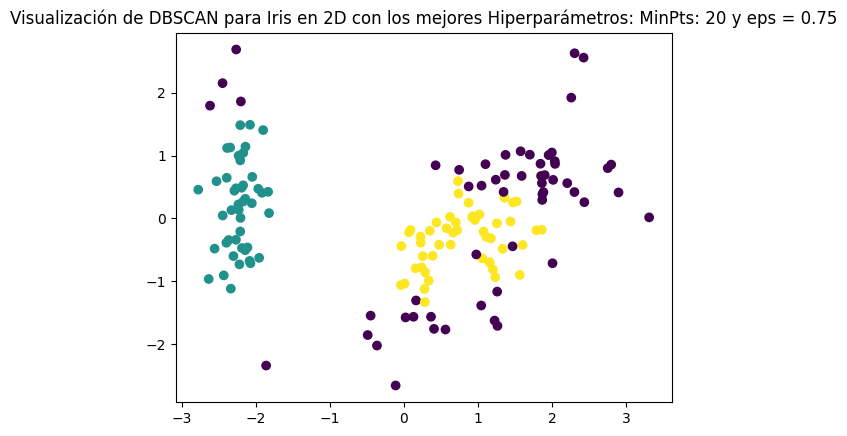

In [18]:
MIN_PTS = 20
EPS = 0.75
sc = StandardScaler()
dbs = DBSCAN(min_samples=MIN_PTS, eps=EPS)
X_sc = sc.fit_transform(X)
labels = dbs.fit_predict(X_sc)
pca_viz(
    pca_X,
    labels=labels,
    title=f"Visualización de DBSCAN para Iris en 2D con los mejores Hiperparámetros: MinPts: {MIN_PTS} y eps = {EPS}",
)